In [1]:
# 1. Install libraries
!pip install pandas scikit-learn transformers sentence-transformers nltk kaggle

import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [2]:
import os

# List all files in the dataset directory
print("Files in dataset folder:")
print(os.listdir(path))

Files in dataset folder:
['Resume', 'data']


In [3]:
import os

resume_dir = os.path.join(path, "Resume")
categories = os.listdir(resume_dir)
print("Categories:", categories)

Categories: ['Resume.csv']


In [4]:
import pandas as pd

resume_data = []

for category in os.listdir(resume_dir):
    category_path = os.path.join(resume_dir, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            try:
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    text = f.read()
                    resume_data.append({"resume": text, "category": category})
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

In [5]:
# Convert to DataFrame
df = pd.DataFrame(resume_data)
print(df.head())

print(f"Total resumes loaded: {len(df)}")
print(df.columns)


Empty DataFrame
Columns: []
Index: []
Total resumes loaded: 0
RangeIndex(start=0, stop=0, step=1)


In [6]:
import os

resume_dir = os.path.join(path, "Resume")

for category in os.listdir(resume_dir):
    category_path = os.path.join(resume_dir, category)
    print(f"Checking category: {category} | Path: {category_path}")
    if os.path.isdir(category_path):
        files = os.listdir(category_path)
        print(f"  ➤ Files found: {len(files)}")
        if files:
            print(f"    First file: {files[0]}")


Checking category: Resume.csv | Path: /kaggle/input/resume-dataset/Resume/Resume.csv


In [7]:
import pandas as pd

csv_path = os.path.join(path, "Resume", "Resume.csv")
df = pd.read_csv(csv_path)
df.head()


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [8]:
print(df.columns)
print(df['Category'].value_counts())

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


In [9]:
category_to_job_desc = {
    "INFORMATION-TECHNOLOGY": "We are seeking a skilled IT professional with experience in software development, troubleshooting, and system architecture.",
    "BUSINESS-DEVELOPMENT": "Looking for a results-driven business developer to generate leads and close partnerships.",
    "ENGINEERING": "Seeking an experienced engineer to design and optimize manufacturing systems.",
    "HR": "Looking for a human resources specialist to manage recruitment, training, and employee engagement.",
    "CHEF": "Hiring a creative chef to plan menus, prepare meals, and manage kitchen staff.",
    "ACCOUNTANT": "We need a qualified accountant to manage financial records, tax filings, and audits."
}


In [10]:
import random

examples = []

for i, row in df.iterrows():
    resume = row['Resume_str']
    true_category = row['Category']

    # Positive example
    if true_category in category_to_job_desc:
        job_desc = category_to_job_desc[true_category]
        examples.append({"resume": resume, "job_description": job_desc, "label": 1})

        # Negative example — randomly choose different category
        wrong_cat = random.choice([cat for cat in category_to_job_desc if cat != true_category])
        wrong_job_desc = category_to_job_desc[wrong_cat]
        examples.append({"resume": resume, "job_description": wrong_job_desc, "label": 0})


In [11]:
train_df = pd.DataFrame(examples)
train_df.head()

,resume,job_description,label
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,Looking for a human resources specialist to ma...,1
1,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,We are seeking a skilled IT professional with ...,0
2,"HR SPECIALIST, US HR OPERATIONS ...",Looking for a human resources specialist to ma...,1
3,"HR SPECIALIST, US HR OPERATIONS ...","Hiring a creative chef to plan menus, prepare ...",0
4,HR DIRECTOR Summary Over 2...,Looking for a human resources specialist to ma...,1


In [12]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader
import pandas as pd
import torch


In [13]:
train_examples = [
    InputExample(texts=[row['resume'], row['job_description']], label=float(row['label']))
    for _, row in train_df.iterrows()
]


In [14]:
model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model=model)


In [16]:
import os
os.environ["WANDB_MODE"] = "disable"

In [17]:
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader

In [18]:
import os
os.environ["WANDB_DISABLED"] = "true"  # fully disable Weights & Biases

model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=1,
    warmup_steps=100,
    show_progress_bar=True,
    output_path="output/"  # explicitly set output path
)


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

Step,Training Loss


In [19]:
model.save("resume_job_matching_model")


In [20]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load model
model = SentenceTransformer("resume_job_matching_model")

# Texts
resume_text = "Experienced data analyst with skills in Python, SQL, and Tableau."
job_desc = "Looking for a data analyst to create dashboards and analyze business trends."

# Encode
embeddings = model.encode([resume_text, job_desc])

# Cosine similarity
similarity = cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]
print(f"Similarity score: {similarity:.4f}")


Similarity score: 0.7949


#  Evaluation & Visualization Upgrade
This section adds **systematic evaluation** (precision/recall/F1, ROC/AUC, confusion matrix, top‑k accuracy), **visualizations** (score distributions, ROC, confusion matrix, t‑SNE), and **README helpers** to polish the project.


In [21]:
# === Imports for evaluation and plots ===
import os
import math
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import List, Dict, Tuple

from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import (
    precision_recall_fscore_support,
    roc_auc_score, roc_curve,
    confusion_matrix, accuracy_score, classification_report
)
from sklearn.manifold import TSNE

# Make plots a bit larger
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 120


## Data prep (safe reconstruction)
This cell ensures `train_df` exists with the expected columns. If it's missing, we rebuild positive/negative pairs from the Kaggle dataset you loaded earlier (`df` built from `Resume/Resume.csv`).

In [22]:
# === Ensure train_df exists with ['resume','job_description','label','true_category'] ===

def ensure_train_pairs_from_df(df: pd.DataFrame) -> pd.DataFrame:
    # Minimal job descriptions per category; fall back to templated text
    base_desc = {
        "INFORMATION-TECHNOLOGY": "Seeking an IT professional with software development, troubleshooting, and systems experience.",
        "BUSINESS-DEVELOPMENT": "Looking for a business developer to generate leads, drive partnerships, and close deals.",
        "ENGINEERING": "Hiring an engineer to design systems, analyze performance, and improve processes.",
        "HR": "Seeking a human resources specialist to manage recruitment, onboarding, benefits, and employee relations.",
        "CHEF": "Hiring a chef to plan menus, prepare dishes, and manage kitchen operations.",
        "ACCOUNTANT": "Looking for an accountant to handle bookkeeping, tax filings, and audits.",
        "FINANCE": "Seeking an analyst with financial modeling and reporting experience.",
        "SALES": "Looking for a sales professional to manage pipeline and close opportunities.",
        "HEALTHCARE": "Seeking healthcare specialist with patient care and clinical experience.",
        "CONSULTANT": "Hiring a consultant to analyze problems, craft solutions, and advise stakeholders."
    }
    def templated_desc(cat: str) -> str:
        return f"We are hiring for a role in {cat.replace('-', ' ').title()}. Responsibilities include relevant domain tasks and collaboration with cross-functional teams."

    # Normalize columns from Resume.csv
    assert {'Resume_str','Category'}.issubset(df.columns), "Expected columns 'Resume_str' and 'Category' in DataFrame."
    examples = []
    cats = sorted(df['Category'].unique().tolist())

    # Build examples: for each resume, construct 1 positive and 1 negative pair
    for _, row in df.iterrows():
        resume = str(row['Resume_str'])
        true_cat = str(row['Category'])
        # Positive pair
        jd_pos = base_desc.get(true_cat, templated_desc(true_cat))
        examples.append({'resume': resume, 'job_description': jd_pos, 'label': 1, 'true_category': true_cat})
        # Negative pair (sample a different category)
        neg_cats = [c for c in cats if c != true_cat]
        if neg_cats:
            wrong_cat = random.choice(neg_cats)
            jd_neg = base_desc.get(wrong_cat, templated_desc(wrong_cat))
            examples.append({'resume': resume, 'job_description': jd_neg, 'label': 0, 'true_category': true_cat})
    return pd.DataFrame(examples)

# Try to detect existing train_df
if 'train_df' not in globals():
    # If user kept original variable name
    if 'examples' in globals():
        train_df = pd.DataFrame(examples)
        if 'true_category' not in train_df.columns and 'df' in globals():
            # Enrich with true_category by joining to original df on resume text
            try:
                m = df[['Resume_str','Category']].drop_duplicates().rename(columns={'Resume_str':'resume','Category':'true_category'})
                train_df = train_df.merge(m, on='resume', how='left')
            except Exception as e:
                print("Could not enrich with true_category:", e)
    elif 'df' in globals():
        print("Rebuilding train_df from original Resume.csv DataFrame...")
        train_df = ensure_train_pairs_from_df(df)
    else:
        raise RuntimeError("No 'train_df' or base 'df' found. Please run the earlier data loading cells first.")

# Basic checks
expected_cols = {'resume','job_description','label'}
missing = expected_cols - set(train_df.columns)
if missing:
    raise RuntimeError(f"train_df is missing columns: {missing}. Expected {expected_cols}." )

# Try to ensure true_category
if 'true_category' not in train_df.columns:
    if 'df' in globals():
        try:
            m = df[['Resume_str','Category']].drop_duplicates().rename(columns={'Resume_str':'resume','Category':'true_category'})
            train_df = train_df.merge(m, on='resume', how='left')
        except Exception as e:
            print("Warning: could not attach true_category from df:", e)

print("train_df shape:", train_df.shape)
print(train_df.head(2))


train_df shape: (1408, 4)
                                              resume  \
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   

                                     job_description  label true_category  
0  Looking for a human resources specialist to ma...      1            HR  
1  We are seeking a skilled IT professional with ...      0            HR  


## Load model (fine-tuned)
This will load your saved fine‑tuned model from `resume_job_matching_model/`. If you changed the path, update it here.


In [23]:
# === Load fine-tuned model ===
model_path_candidates = [
    "resume_job_matching_model",
    "output",
    "./resume_job_matching_model",
    "./output"
]
loaded = False
for mp in model_path_candidates:
    if os.path.exists(mp):
        try:
            model = SentenceTransformer(mp)
            print("Loaded fine-tuned model from:", mp)
            loaded = True
            break
        except Exception as e:
            print("Tried", mp, "->", e)

if not loaded:
    print("Falling back to base model 'all-MiniLM-L6-v2' (fine-tuned path not found).")
    model = SentenceTransformer("all-MiniLM-L6-v2")


Loaded fine-tuned model from: resume_job_matching_model


## Utilities
Helper functions for similarity and plots.


In [24]:
# === Utilities ===
def pair_similarity(mdl: SentenceTransformer, a: str, b: str) -> float:
    emb = mdl.encode([a, b])
    return float(cosine_similarity([emb[0]], [emb[1]])[0][0])

def batched_pair_similarity(mdl: SentenceTransformer, texts_a: List[str], texts_b: List[str], batch_size: int = 64) -> np.ndarray:
    assert len(texts_a) == len(texts_b)
    sims = []
    for i in range(0, len(texts_a), batch_size):
        batch_a = texts_a[i:i+batch_size]
        batch_b = texts_b[i:i+batch_size]
        emb_a = mdl.encode(batch_a)
        emb_b = mdl.encode(batch_b)
        sims.extend(cosine_similarity(emb_a, emb_b).diagonal())
    return np.array(sims)

def plot_confusion_matrix(cm: np.ndarray, labels: List[str], title: str):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)
    # annotate
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center")
    plt.show()


## Evaluation (accuracy, precision, recall, F1, ROC/AUC)
compute metrics on a held‑out test split. We also select an **optimal threshold** by maximizing F1 and show a confusion matrix.


Default threshold = 0.50
Accuracy:  0.957
Precision: 0.992
Recall:    0.922
F1-score:  0.956
AUC:       0.993

Classification report (default threshold):

              precision    recall  f1-score   support

           0      0.927     0.993     0.959       141
           1      0.992     0.922     0.956       141

    accuracy                          0.957       282
   macro avg      0.960     0.957     0.957       282
weighted avg      0.960     0.957     0.957       282



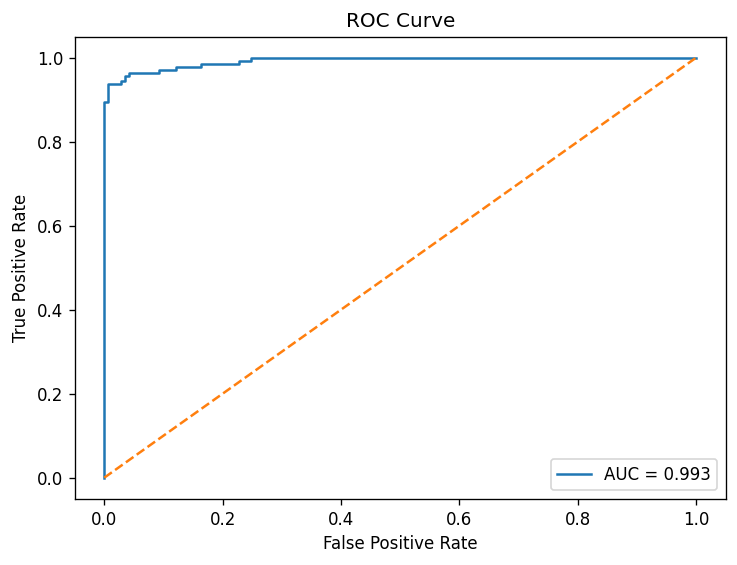

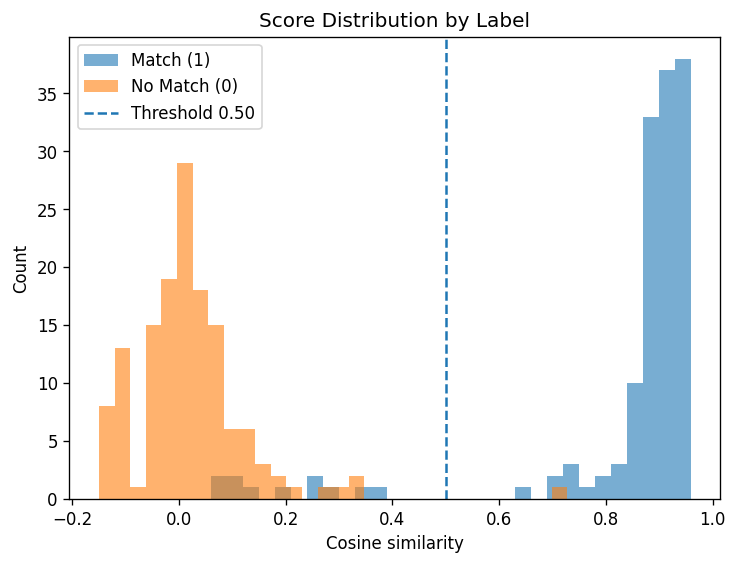

Best F1 = 0.964 at threshold = 0.325


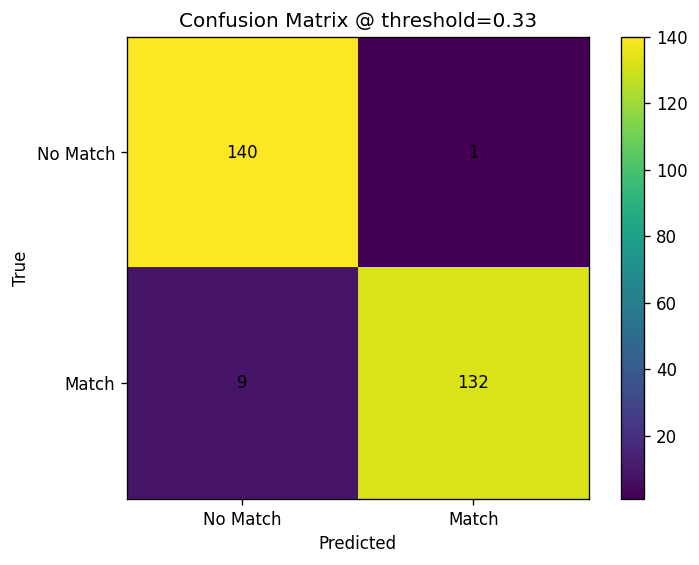

In [25]:
# === Train / Test split ===
X = train_df[['resume','job_description']].copy()
y = train_df['label'].astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# === Scores on test set ===
scores = batched_pair_similarity(model, X_test['resume'].tolist(), X_test['job_description'].tolist())

# Default threshold and metrics
default_threshold = 0.5
preds_default = (scores >= default_threshold).astype(int)

acc = accuracy_score(y_test, preds_default)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, preds_default, average='binary', zero_division=0)
auc = roc_auc_score(y_test, scores)

print(f"Default threshold = {default_threshold:.2f}")
print(f"Accuracy:  {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-score:  {f1:.3f}")
print(f"AUC:       {auc:.3f}")

print("\nClassification report (default threshold):\n")
print(classification_report(y_test, preds_default, digits=3))

# === ROC Curve ===
fpr, tpr, roc_thresholds = roc_curve(y_test, scores)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# === Score distribution ===
plt.figure()
plt.hist(scores[y_test==1], bins=30, alpha=0.6, label="Match (1)")
plt.hist(scores[y_test==0], bins=30, alpha=0.6, label="No Match (0)")
plt.axvline(default_threshold, linestyle='--', label=f"Threshold {default_threshold:.2f}")
plt.xlabel("Cosine similarity")
plt.ylabel("Count")
plt.title("Score Distribution by Label")
plt.legend()
plt.show()

# === Optimal threshold via F1 sweep ===
candidate_thresholds = np.linspace(0.1, 0.9, 33)
best_f1 = -1.0
best_t = default_threshold
for t in candidate_thresholds:
    preds = (scores >= t).astype(int)
    _, _, f1_t, _ = precision_recall_fscore_support(y_test, preds, average='binary', zero_division=0)
    if f1_t > best_f1:
        best_f1, best_t = f1_t, t

print(f"Best F1 = {best_f1:.3f} at threshold = {best_t:.3f}")
preds_best = (scores >= best_t).astype(int)
cm = confusion_matrix(y_test, preds_best)
plot_confusion_matrix(cm, labels=['No Match','Match'], title=f"Confusion Matrix @ threshold={best_t:.2f}")


## Top‑k accuracy (resume → job ranking)
For each resume in the **test set**, we rank a set of synthetic job descriptions (one per category) by similarity and check whether the **true category** appears in the top‑k.


In [26]:
# === Build category -> job description mapping ===
def build_category_descriptions(categories: List[str]) -> Dict[str, str]:
    base_desc = {}
    for c in categories:
        base_desc[c] = f"Hiring for {c.replace('-', ' ').title()}: responsibilities include domain-specific tasks, collaboration, and continuous improvement."
    return base_desc

# Infer a resume -> true category mapping
resume_to_true = {}
if 'true_category' in train_df.columns and not train_df['true_category'].isna().all():
    # use existing
    tmp = train_df[['resume','true_category']].dropna().drop_duplicates()
    for _, r in tmp.iterrows():
        resume_to_true[r['resume']] = r['true_category']
elif 'df' in globals():
    tmp = df[['Resume_str','Category']].drop_duplicates().rename(columns={'Resume_str':'resume','Category':'true_category'})
    for _, r in tmp.iterrows():
        resume_to_true[r['resume']] = r['true_category']

# Categories present in original dataset (fallback to those present in train_df job_descriptions if unknown)
if 'df' in globals():
    all_categories = sorted(df['Category'].unique().tolist())
else:
    # try to parse categories out of job descriptions (weak fallback)
    all_categories = sorted(list({resume_to_true.get(r, 'GENERAL') for r in X_test['resume'].tolist()}))

cat_to_jd = build_category_descriptions(all_categories)

# Compute Top-k
k = 3
unique_resumes = X_test['resume'].unique().tolist()
hits = 0
total = 0

for res in unique_resumes:
    true_cat = resume_to_true.get(res, None)
    if true_cat is None or true_cat not in cat_to_jd:
        continue  # skip if we cannot identify true category
    jds = [(cat, jd) for cat, jd in cat_to_jd.items()]
    # compute similarity against each synthetic JD once
    res_emb = model.encode([res])[0]
    jd_texts = [jd for _, jd in jds]
    jd_embs = model.encode(jd_texts)
    sims = cosine_similarity([res_emb], jd_embs)[0]
    order = np.argsort(-sims)
    ranked = [(jds[i][0], sims[i]) for i in order]
    topk = [cat for cat, _ in ranked[:k]]
    if true_cat in topk:
        hits += 1
    total += 1

if total > 0:
    print(f"Top-{k} Accuracy: {hits/total:.3f}  ({hits}/{total})")
else:
    print("Top-k evaluation skipped (no resumes with identifiable true category in test set).")


Top-3 Accuracy: 0.953  (242/254)


## t‑SNE embedding visualization (by category)
I embed a sample of resumes, reduce to 2D with t‑SNE, and plot by category to show clustering behavior.


t-SNE sample size: 800


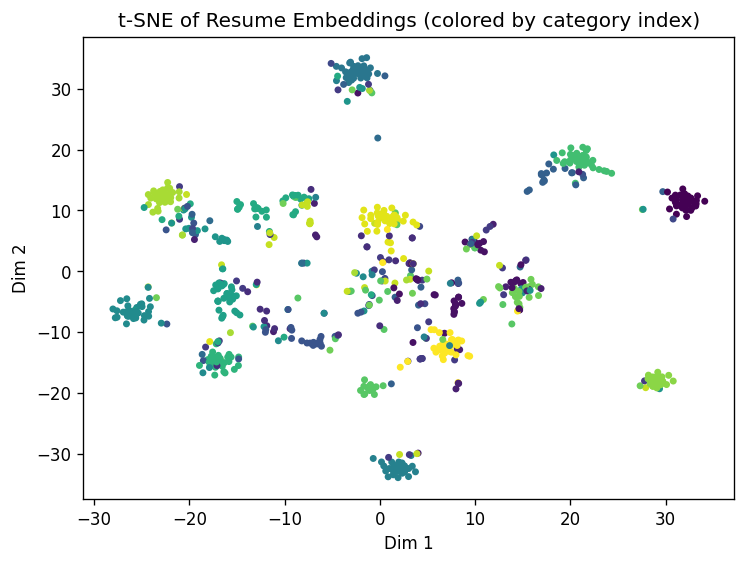

In [27]:
# === t-SNE of resume embeddings colored by category ===
# Build a sample (to keep compute/time reasonable)
if 'df' in globals():
    vis_df = df[['Resume_str','Category']].rename(columns={'Resume_str':'resume','Category':'category'}).dropna()
    # cap sample size
    max_n = 800
    if len(vis_df) > max_n:
        vis_df = vis_df.sample(max_n, random_state=42)
else:
    # derive from train_df if original df is not available
    col = 'true_category' if 'true_category' in train_df.columns else None
    if col is None:
        raise RuntimeError("Cannot build visualization sample: no category labels available.")
    vis_df = train_df[['resume', col]].rename(columns={col: 'category'}).dropna()
    max_n = 800
    if len(vis_df) > max_n:
        vis_df = vis_df.sample(max_n, random_state=42)

print("t-SNE sample size:", len(vis_df))

# Encode resumes, then reduce
embs = model.encode(vis_df['resume'].tolist())
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate='auto')
coords = tsne.fit_transform(embs)

# Plot
plt.figure()
cats = vis_df['category'].astype(str).values
# Map categories to integers for plotting markers
unique_cats = sorted(list(set(cats)))
cat_to_int = {c:i for i,c in enumerate(unique_cats)}
ints = np.array([cat_to_int[c] for c in cats])

scatter = plt.scatter(coords[:,0], coords[:,1], c=ints, s=10)
plt.title("t-SNE of Resume Embeddings (colored by category index)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()


## Quick demo: score a resume against a job description

In [28]:
# === Quick demo ===
demo_resume = """Experienced data analyst with skills in Python, SQL, and Tableau.
Built automated dashboards and ETL pipelines; collaborated with business stakeholders."""

demo_job = """Looking for a data analyst to create dashboards, build ETL pipelines,
and analyze business trends in collaboration with product and finance teams."""

print("Similarity:", round(pair_similarity(model, demo_resume, demo_job), 4))


Similarity: 0.9177


# Stronger Evaluation: Resume-Level Split
To avoid leakage (the same resume appearing in both train and test pairs), this section performs a **resume-level** split first, then builds positive/negative pairs **within each split**. Metrics are recomputed on the test split.


Train pairs: (3970, 4)  Test pairs: (994, 4)
[Resume-level] Accuracy:  0.833
[Resume-level] Precision: 0.985
[Resume-level] Recall:    0.676
[Resume-level] F1-score:  0.802
[Resume-level] AUC:       0.929

[Resume-level] Classification report:

              precision    recall  f1-score   support

           0      0.753     0.990     0.856       497
           1      0.985     0.676     0.802       497

    accuracy                          0.833       994
   macro avg      0.869     0.833     0.829       994
weighted avg      0.869     0.833     0.829       994



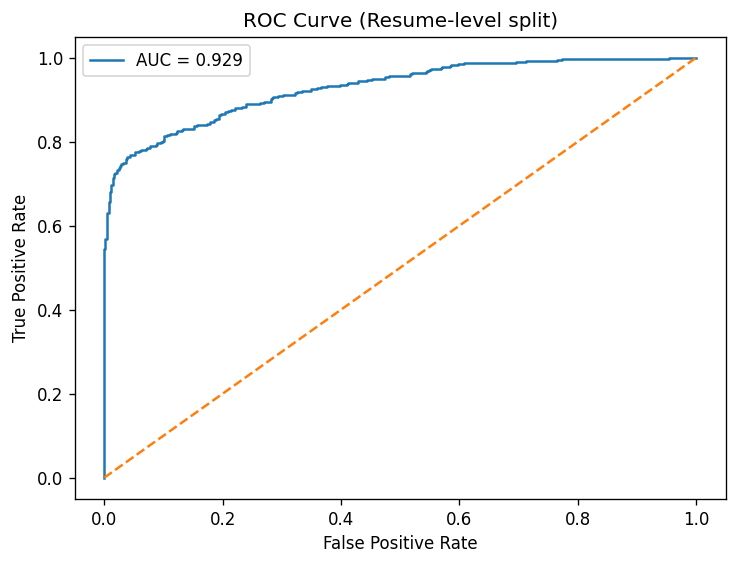

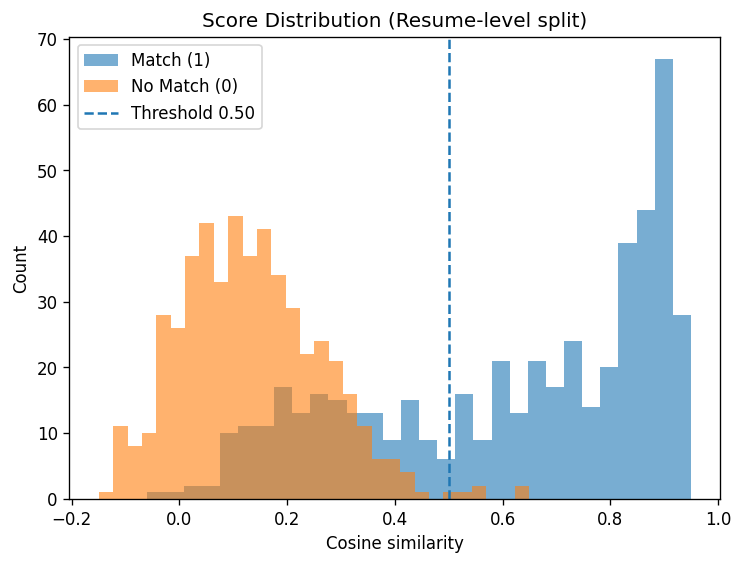

[Resume-level] Best F1 = 0.847 at threshold 0.300


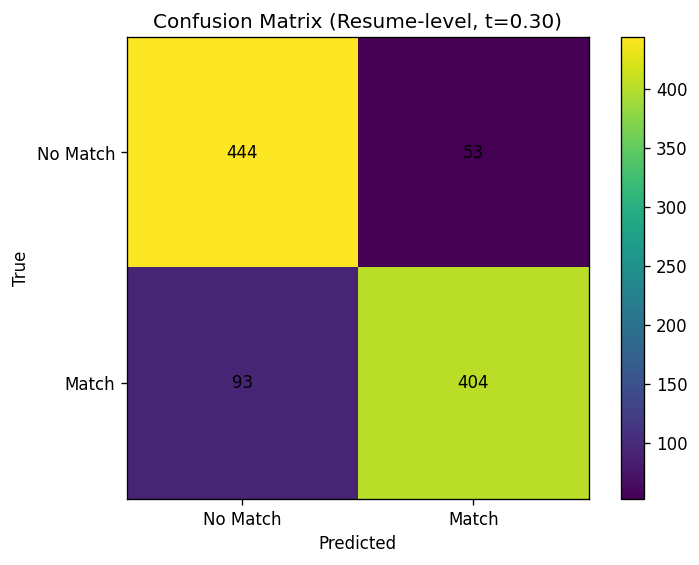

In [30]:
# === Resume-level split to avoid leakage ===
import os
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_recall_fscore_support, roc_auc_score, roc_curve,
    confusion_matrix, accuracy_score, classification_report
)
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Expect `df` to be the full Resume.csv DataFrame with columns ['Resume_str','Category']
assert 'df' in globals(), "Resume-level split requires the original DataFrame 'df' from Resume.csv."

# Use only needed columns and drop duplicates
base = df[['Resume_str','Category']].dropna().drop_duplicates().rename(
    columns={'Resume_str':'resume','Category':'category'}
)

# Split unique resumes (stratify by category when possible)
train_resumes, test_resumes = train_test_split(
    base, test_size=0.20, random_state=42, stratify=base['category']
)

# Build category->JD map
def build_cat_to_jd(categories):
    return {c: f"Hiring for {c.replace('-', ' ').title()}: responsibilities include domain-specific tasks, collaboration, and continuous improvement."
            for c in categories}

cat_to_jd = build_cat_to_jd(sorted(base['category'].unique().tolist()))

# Helper to construct pairs: one positive + one negative per resume
def make_pairs(df_split, cat_to_jd):
    rows = []
    cats = list(cat_to_jd.keys())
    for _, r in df_split.iterrows():
        res = str(r['resume']); true_cat = str(r['category'])
        # positive
        rows.append({'resume': res, 'job_description': cat_to_jd[true_cat], 'label': 1, 'true_category': true_cat})
        # negative (random other category)
        neg_choices = [c for c in cats if c != true_cat]
        if neg_choices:
            wrong = random.choice(neg_choices)
            rows.append({'resume': res, 'job_description': cat_to_jd[wrong], 'label': 0, 'true_category': true_cat})
    return pd.DataFrame(rows)

train_pairs = make_pairs(train_resumes, cat_to_jd)
test_pairs  = make_pairs(test_resumes,  cat_to_jd)

print("Train pairs:", train_pairs.shape, " Test pairs:", test_pairs.shape)

# === Compute similarities on test_pairs using the (fine-tuned) model ===
def batched_pair_similarity(model, texts_a, texts_b, batch_size=64):
    sims = []
    for i in range(0, len(texts_a), batch_size):
        a = texts_a[i:i+batch_size]
        b = texts_b[i:i+batch_size]
        A = model.encode(a)
        B = model.encode(b)
        sims.extend(cosine_similarity(A, B).diagonal())
    return np.array(sims)

scores_rl = batched_pair_similarity(model, test_pairs['resume'].tolist(), test_pairs['job_description'].tolist())
y_rl = test_pairs['label'].astype(int).values

# Default threshold metrics
thr = 0.5
preds_rl = (scores_rl >= thr).astype(int)

acc_rl = accuracy_score(y_rl, preds_rl)
prec_rl, rec_rl, f1_rl, _ = precision_recall_fscore_support(y_rl, preds_rl, average='binary', zero_division=0)
auc_rl = roc_auc_score(y_rl, scores_rl)

print(f"[Resume-level] Accuracy:  {acc_rl:.3f}")
print(f"[Resume-level] Precision: {prec_rl:.3f}")
print(f"[Resume-level] Recall:    {rec_rl:.3f}")
print(f"[Resume-level] F1-score:  {f1_rl:.3f}")
print(f"[Resume-level] AUC:       {auc_rl:.3f}")
print("\n[Resume-level] Classification report:\n")
print(classification_report(y_rl, preds_rl, digits=3))

# ROC
fpr_rl, tpr_rl, _ = roc_curve(y_rl, scores_rl)
plt.figure()
plt.plot(fpr_rl, tpr_rl, label=f"AUC = {auc_rl:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("ROC Curve (Resume-level split)"); plt.legend()
plt.show()

# Distribution
plt.figure()
plt.hist(scores_rl[y_rl==1], bins=30, alpha=0.6, label="Match (1)")
plt.hist(scores_rl[y_rl==0], bins=30, alpha=0.6, label="No Match (0)")
plt.axvline(thr, linestyle='--', label=f"Threshold {thr:.2f}")
plt.xlabel("Cosine similarity"); plt.ylabel("Count"); plt.title("Score Distribution (Resume-level split)"); plt.legend()
plt.show()

# Best F1 threshold
cands = np.linspace(0.1, 0.9, 33)
best_f1_rl, best_t_rl = -1.0, thr
for t in cands:
    preds = (scores_rl >= t).astype(int)
    _, _, f1t, _ = precision_recall_fscore_support(y_rl, preds, average='binary', zero_division=0)
    if f1t > best_f1_rl:
        best_f1_rl, best_t_rl = f1t, t

from sklearn.metrics import confusion_matrix
cm_rl = confusion_matrix(y_rl, (scores_rl >= best_t_rl).astype(int))
print(f"[Resume-level] Best F1 = {best_f1_rl:.3f} at threshold {best_t_rl:.3f}")

# Simple confusion matrix plot
plt.figure()
plt.imshow(cm_rl)
plt.title(f"Confusion Matrix (Resume-level, t={best_t_rl:.2f})")
plt.colorbar()
plt.xticks([0,1], ["No Match","Match"]); plt.yticks([0,1], ["No Match","Match"])
for (i,j), v in np.ndenumerate(cm_rl):
    plt.text(j, i, str(v), ha='center', va='center')
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


In [31]:
# === Top-k evaluation (resume-level split) ===
k = 3
hits, total = 0, 0

# Pre-encode category JDs once
jd_texts = [cat_to_jd[c] for c in cat_to_jd]
jd_embs = model.encode(jd_texts)
cats = list(cat_to_jd.keys())

for _, row in test_resumes.iterrows():
    res = row['resume']; true_cat = row['category']
    res_emb = model.encode([res])[0]
    sims = cosine_similarity([res_emb], jd_embs)[0]
    top_idx = np.argsort(-sims)[:k]
    top_cats = [cats[i] for i in top_idx]
    if true_cat in top_cats:
        hits += 1
    total += 1

if total > 0:
    print(f"[Resume-level] Top-{k} Accuracy: {hits/total:.3f}  ({hits}/{total})")
else:
    print("No resumes available for Top-k evaluation.")


[Resume-level] Top-3 Accuracy: 0.797  (396/497)


In [32]:
import os
from pathlib import Path

FIG_DIR = Path('figures')
FIG_DIR.mkdir(exist_ok=True)

# Example: save the last figure again with a name (you can repeat for other plots if you want)
plt.figure()
plt.imshow(cm_rl)
plt.title(f"Confusion Matrix (Resume-level, t={best_t_rl:.2f})")
plt.colorbar()
plt.xticks([0,1], ["No Match","Match"]); plt.yticks([0,1], ["No Match","Match"])
for (i,j), v in np.ndenumerate(cm_rl):
    plt.text(j, i, str(v), ha='center', va='center')
plt.xlabel("Predicted"); plt.ylabel("True")
plt.savefig(FIG_DIR / 'confusion_matrix_resume_level.png', bbox_inches='tight')
plt.close()

print("Saved to:", FIG_DIR.resolve())


Saved to: /content/figures


## t‑SNE legend improvement
Adds a legend mapping **category index → category name** for readability.


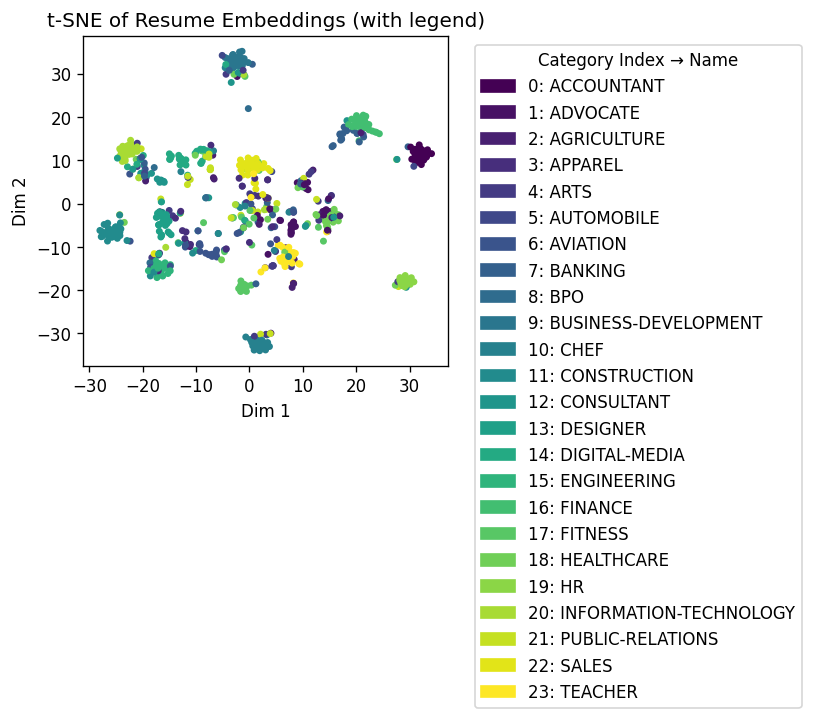

In [33]:
# Re-run t-SNE plot with legend mapping
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

if 'vis_df' in globals():
    embs = model.encode(vis_df['resume'].tolist())
    tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate='auto')
    coords = tsne.fit_transform(embs)

    cats = vis_df['category'].astype(str).values
    unique_cats = sorted(list(set(cats)))
    cat_to_int = {c:i for i,c in enumerate(unique_cats)}
    ints = np.array([cat_to_int[c] for c in cats])

    plt.figure()
    scatter = plt.scatter(coords[:,0], coords[:,1], c=ints, s=10)

    # Build legend handles manually (small colored points with labels)
    import matplotlib.patches as mpatches
    handles = []
    cmap = scatter.cmap
    norm = scatter.norm
    for c in unique_cats:
        idx = cat_to_int[c]
        color = cmap(norm(idx))
        handles.append(mpatches.Patch(color=color, label=f"{idx}: {c}"))
    plt.legend(handles=handles, title="Category Index → Name", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("t-SNE of Resume Embeddings (with legend)")
    plt.xlabel("Dim 1"); plt.ylabel("Dim 2")
    plt.tight_layout()
    plt.show()
else:
    print("vis_df not found; run the earlier t-SNE cell first.")
